In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: xlabel='placement_exam_marks', ylabel='Count'>

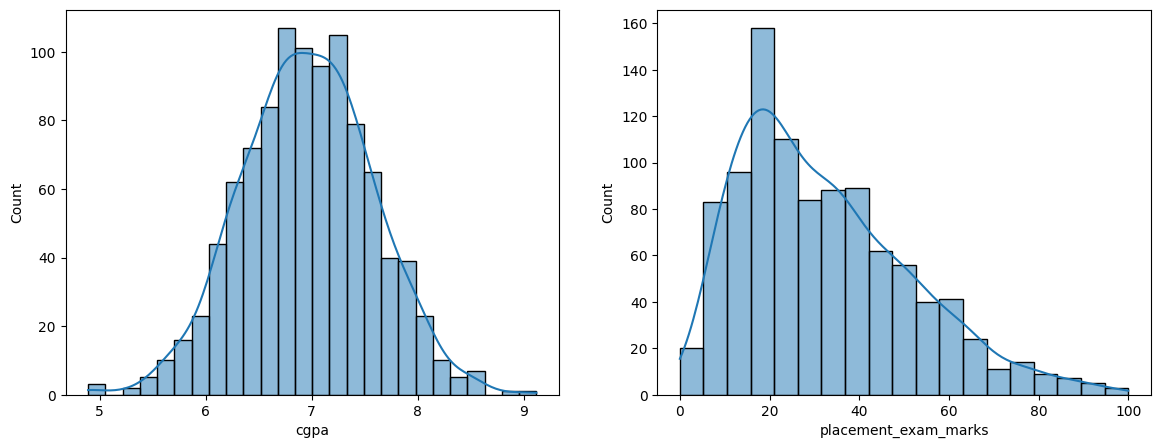

In [3]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.histplot(df['cgpa'],kde=True)
plt.subplot(122)
sns.histplot(df['placement_exam_marks'],kde=True)

In [4]:
print('highest value',df['cgpa'].mean() + 3*df['cgpa'].std())
print('lowest value',df['cgpa'].mean() - 3*df['cgpa'].std())

highest value 8.808933625397168
lowest value 5.113546374602832


In [5]:
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [7]:
new_cgpa = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_cgpa

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


### Capping 
Capping is the technique of limiting outlier values by setting upper and lower bounds 
If the upper limit is 8, then all values greater than 8 will be capped at 8.

In [9]:
upper_limit  =  df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit  =  df['cgpa'].mean() - 3*df['cgpa'].std()

In [10]:
upper_limit

np.float64(8.808933625397168)

In [11]:
df['cgpa'] = np.where(
    df['cgpa'] > upper_limit,
    upper_limit,
    np.where(
        df['cgpa'] < lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [12]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961499,32.225000,0.489000
std,0.612688,19.130822,0.500129
min,5.113546,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,8.808934,100.000000,1.000000
